In [44]:
import pandas as pd, numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv('./datasets/titanic_train.csv')
test  = pd.read_csv('./datasets/titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data preparation

In [5]:
data = pd.concat([train, test])

In [6]:
to_drop = ['PassengerId', 'Ticket', 'Cabin', 'Name']
data.drop(to_drop, axis=1, inplace=True)

data.Sex, mapper_sex      = pd.factorize(data.Sex)
data.Embarked, mapper_emb = pd.factorize(data.Embarked)

data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22,0,7.2500,0,3,0,1,0
1,38,1,71.2833,0,1,1,1,1
2,26,0,7.9250,0,3,1,0,1
3,35,0,53.1000,0,1,1,1,1
4,35,0,8.0500,0,3,0,0,0


In [9]:
train = data[~pd.isnull(data.Survived)].fillna(0.0)
test  = data.loc[pd.isnull(data.Survived)].fillna(0.0)

test.drop('Survived', axis=1, inplace=True)

In [10]:
from sklearn.ensemble import RandomForestClassifier

train_x = train.drop('Survived', axis=1)
train_y = train.Survived

rf = RandomForestClassifier(n_estimators=250)
rf.fit(train_x, train_y)

preds = rf.predict(test)

In [13]:
from treeinterpreter import treeinterpreter

In [52]:
pred, bias, contrib = treeinterpreter.predict(rf, test)
contrib = pd.DataFrame(contrib[:,:,1], columns=test.columns)

In [39]:
test[test.Sex == 1]

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
1,47.00,0,7.0000,0,3,1,1
4,22.00,0,12.2875,1,3,1,1
6,30.00,2,7.6292,0,3,1,0
8,18.00,1,7.2292,0,3,1,0
12,23.00,0,82.2667,0,1,1,1
14,47.00,0,61.1750,0,1,1,1
15,24.00,1,27.7208,0,2,1,1
18,27.00,0,7.9250,0,3,1,1
19,45.00,1,7.2250,0,3,1,0
22,0.00,0,31.6833,0,1,1,0


In [40]:
test.iloc[14]

Age         47.000
Embarked     0.000
Fare        61.175
Parch        0.000
Pclass       1.000
Sex          1.000
SibSp        1.000
Name: 14, dtype: float64

In [72]:
print bias[14, 1]
print sum(contrib.iloc[14])
print pred[14, 1]

0.384372615039
0.547627384961
0.932


In [77]:
test.iloc[14]

Age         47.000
Embarked     0.000
Fare        61.175
Parch        0.000
Pclass       1.000
Sex          1.000
SibSp        1.000
Name: 14, dtype: float64

In [53]:
contrib.iloc[14]

Age        -0.033519
Embarked   -0.015653
Fare        0.113503
Parch       0.001263
Pclass      0.147099
Sex         0.317306
SibSp       0.017629
Name: 14, dtype: float64

In [76]:
c.values

array([-0.03351904, -0.0156527 ,  0.00126266,  0.01762872,  0.11350337,
        0.14709872,  0.31730565])

In [51]:
c = contrib.iloc[14].sort_values()

Age        -0.033519
Embarked   -0.015653
Fare        0.113503
Parch       0.001263
Pclass      0.147099
Sex         0.317306
SibSp       0.017629
Name: 14, dtype: float64

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import svgutils.transform as sg


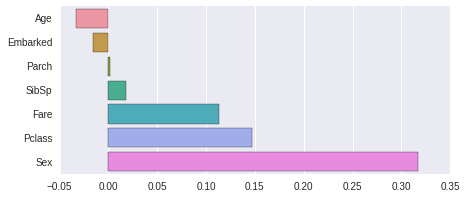

In [69]:
fig = plt.figure(figsize=(7, 3))

sns.barplot(c.values, c.index)

fig.savefig('plot.svg')